# Linear Regression

### Setting up the environment

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
sns.set()
np.random.seed(100)

### Generating data

In [2]:
# Parameters
num_dims = 1
num_data_points = 50
data_size = (num_data_points, num_dims)
x_scale = 20.
x_offset = -10.
noise_scale = 5.
weights_scale = np.array([10., 6.])
weights_offset = np.array([-5., -3.])

weights = (np.random.random((num_dims + 1,)) * weights_scale) + weights_offset

In [3]:
# Generating the data
X = (np.random.random(data_size) * x_scale) + x_offset

Xa = np.concatenate((np.ones((num_data_points, 1)), X), 1)
y = (Xa @ weights) + np.random.normal(0., noise_scale, (num_data_points,))

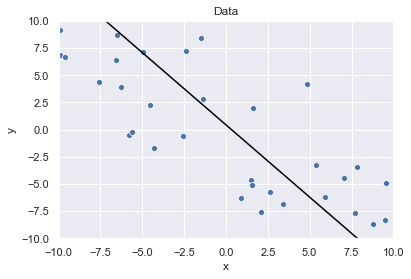

In [4]:
# Visualization
fig_data = plt.figure()
plt.xlabel('x')
plt.xlim((-10, 10))
plt.ylabel('y')
plt.ylim((-10, 10))
plt.title('Data')
ax_data = sns.scatterplot(x=Xa[:, 1], y=y)
sns.lineplot(x=Xa[:, 1], y=Xa @ weights, color='black', ax=ax_data)
plt.show()

### Regression

In [5]:
# Parameters
alpha = 5e-5
tolerance = 1.5
max_iterations = 1000

In [6]:
# Regression
trace_w = []

iteration = 0
last_loss = np.infty
w = (np.random.random((num_dims + 1,)) * weights_scale) + weights_offset
trace_w.append(w.copy())
yhat = Xa @ w
delta = y - yhat
loss = delta @ delta
while np.abs(last_loss - loss) > tolerance:
    iteration += 1
    if iteration > max_iterations:
        iteration -= 1
        break
    nabla_w = -2 * (delta @ Xa)
    w -= alpha * nabla_w
    trace_w.append(w.copy())
    yhat = Xa @ w
    delta = y - yhat
    last_loss = loss
    loss = delta @ delta
print("Linear regression finished after " + str(iteration) + " iterations.")

Linear regression finished after 33 iterations.


In [7]:
%%capture
# Creating animated vissualization
fig = plt.figure()
camera = Camera(fig)
plt.xlabel('x')
plt.ylabel('y')

plt.title('Linear Regression')

for i in range(iteration):
    w = trace_w[i]
    ax = sns.scatterplot(x=Xa[:, 1], y=y, legend=False)
    sns.lineplot(x=Xa[:, 1], y=Xa @ w, color='black', legend=False, ax=ax)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    camera.snap()

animation = camera.animate()
ax = sns.scatterplot(x=Xa[:, 1], y=y, legend=False)
plt.show()

In [8]:
# Playing the animation
HTML(animation.to_jshtml())